# Wage Pressure Model

## V2.11

    1. Use +/-1, +/-3, +/-5 and 0 to quantify the Score changes
    2. Get the mean from latest date for each column, and then scale the score change by different to the mean value.
    3. Use ['CurrentStaffingScore', 'TurnoverScore', 'RecruitingScore',
         'UnemploymentScore', 'KohlstoCountyCompScore', 'CountyScore',
        'AcceptanceRateScore','ApplicantFlowScore']
    4. Use K-Means and K-Modes Clustering with 5 Clusters
    5. Use hierarchy clustering  with “from sklearn.cluster import AgglomerativeClustering”

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import re
import math
%matplotlib inline

## Read in Dataset

In [2]:
df = pd.read_csv('2017 Wage Pressure Model_example.csv')
location = pd.read_csv('Store_location_m.csv')

def getZip(x):
    
    if len(x) <= 1:
        return ''
    elif len(x) < 5:
        return '0' + str(x)
    else:
        return str(x[:5])

location['zip'] = location['PSTL_CDE'].map(lambda x: getZip(x))
location = location.rename(columns={'EI_LOC_ID':'Location'})

In [3]:
# location.zip.tolist()

In [4]:
names = df.columns.tolist()
new_names = []
for i in names:
    t = re.findall(r'[a-zA-Z]+', i)
    new_names.append(''.join(t))
    
for i,j in zip(names, new_names):
    df.rename(columns={i:j}, inplace=True)

In [5]:
df_saved = df.copy(deep=True)
changecolumns = ['CurrentStaffingScore', 'TurnoverScore', 'RecruitingScore',
         'UnemploymentScore', 'KohlstoCountyCompScore', 'CountyScore',
        'AcceptanceRateScore','ApplicantFlowScore']
df = df[['Location','EFFDT'] + changecolumns]

In [6]:
df.isnull().sum()

Location                    0
EFFDT                       0
CurrentStaffingScore        1
TurnoverScore               2
RecruitingScore           103
UnemploymentScore          66
KohlstoCountyCompScore     68
CountyScore                68
AcceptanceRateScore       100
ApplicantFlowScore        103
dtype: int64

In [7]:
df4_saved = df_saved[df_saved['EFFDT'] == '1/27/18'].copy(deep=True)
df = df.dropna()

In [8]:
df.notnull().sum()

Location                  4489
EFFDT                     4489
CurrentStaffingScore      4489
TurnoverScore             4489
RecruitingScore           4489
UnemploymentScore         4489
KohlstoCountyCompScore    4489
CountyScore               4489
AcceptanceRateScore       4489
ApplicantFlowScore        4489
dtype: int64

In [9]:
df1 = df[df['EFFDT'] == '4/1/17'].copy(deep=True)
df2 = df[df['EFFDT'] == '7/29/17'].copy(deep=True)
df3 = df[df['EFFDT'] == '10/28/17'].copy(deep=True)
df4 = df[df['EFFDT'] == '1/27/18'].copy(deep=True)

In [10]:
for i in changecolumns:
    df1.rename(columns={i:i+'1'}, inplace=True)
    df2.rename(columns={i:i+'2'}, inplace=True)
    df3.rename(columns={i:i+'3'}, inplace=True)
    
df1 = df1[['Location'] + [i+'1' for i in changecolumns]]
df2 = df2[['Location'] + [i+'2' for i in changecolumns]]
df3 = df3[['Location'] + [i+'3' for i in changecolumns]]
df4 = df4[['Location'] + changecolumns]

In [11]:
df4 = df4.join(df1.set_index('Location'), on='Location')
df4 = df4.join(df2.set_index('Location'), on='Location')
df4 = df4.join(df3.set_index('Location'), on='Location')

In [12]:
df4 = df4.dropna()

In [13]:
# df4.notnull().sum()

In [14]:
def measureScore(*x):
    
    s = 0
    
    s += 1 if x[2] > x[1] else -1 if x[2] < x[1] else 0
    s += 3 if x[3] > x[2] else -3 if x[3] < x[2] else 0 
    s += 5 if x[0] > x[3] else -5 if x[0] < x[3] else 0
    
    return s
    
for i in changecolumns:
    df4[i+'Measure'] = df4[[i, i+'1', i+'2', i+'3']].apply(lambda x: measureScore(*x), axis=1) 

In [15]:
df4.head()

,Location,CurrentStaffingScore,TurnoverScore,RecruitingScore,UnemploymentScore,KohlstoCountyCompScore,CountyScore,AcceptanceRateScore,ApplicantFlowScore,CurrentStaffingScore1,...,AcceptanceRateScore3,ApplicantFlowScore3,CurrentStaffingScoreMeasure,TurnoverScoreMeasure,RecruitingScoreMeasure,UnemploymentScoreMeasure,KohlstoCountyCompScoreMeasure,CountyScoreMeasure,AcceptanceRateScoreMeasure,ApplicantFlowScoreMeasure
3445,7,1.0,4.0,2.4,4.0,3.0,3.5,2.0,3.0,1.0,...,1.0,3.0,0,3,2,-2,0,-2,2,3
3446,8,1.0,3.0,2.0,5.0,5.0,5.0,2.0,2.0,1.0,...,1.0,3.0,-2,-1,9,1,3,4,5,-1
3447,9,1.0,4.0,2.2,5.0,4.0,4.5,3.0,1.0,1.0,...,1.0,2.0,-2,0,1,1,3,4,1,-4
3448,10,1.0,2.0,2.6,4.0,3.0,3.5,3.0,2.0,1.0,...,1.0,3.0,-1,1,1,-2,3,1,1,-2
3449,11,1.0,3.0,2.0,3.0,3.0,3.0,2.0,2.0,2.0,...,1.0,2.0,-2,-1,1,-2,3,1,1,1


In [16]:
df_mean = {}
for i in changecolumns:
    df_mean[i] = int(df4[i].mean()*10) / 10

In [17]:
df_mean

{'AcceptanceRateScore': 2.5,
 'ApplicantFlowScore': 1.9,
 'CountyScore': 3.7,
 'CurrentStaffingScore': 1.1,
 'KohlstoCountyCompScore': 3.4,
 'RecruitingScore': 2.3,
 'TurnoverScore': 2.7,
 'UnemploymentScore': 4.1}

In [18]:
def scaleScore(x1, x2, avg):
    
    diff = x2 - avg
    if diff >= 0:
        diff += 1
    elif diff < 0:
        diff -= -1
        
    return x1 * diff

for i in changecolumns:
    df4[i+'Scale'] = df4[[i+'Measure', i]].apply(lambda x: scaleScore(x1 = x[0], x2 = x[1], avg = df_mean[i]), axis=1)

In [19]:
df4 = df4[['Location'] + [i + 'Measure' for i in changecolumns] + [i + 'Scale' for i in changecolumns]]

In [20]:
df4.dtypes

Location                           int64
CurrentStaffingScoreMeasure        int64
TurnoverScoreMeasure               int64
RecruitingScoreMeasure             int64
UnemploymentScoreMeasure           int64
KohlstoCountyCompScoreMeasure      int64
CountyScoreMeasure                 int64
AcceptanceRateScoreMeasure         int64
ApplicantFlowScoreMeasure          int64
CurrentStaffingScoreScale        float64
TurnoverScoreScale               float64
RecruitingScoreScale             float64
UnemploymentScoreScale           float64
KohlstoCountyCompScoreScale      float64
CountyScoreScale                 float64
AcceptanceRateScoreScale         float64
ApplicantFlowScoreScale          float64
dtype: object

In [21]:
print('CurrentStaffingScoreScale min is %8.2f, max is %8.2f.'%
      (min(df4['CurrentStaffingScoreScale'].unique()), max(df4['CurrentStaffingScoreScale'].unique())))
print('TurnoverScoreScale min is %8.2f, max is %8.2f.'%
      (min(df4['TurnoverScoreScale'].unique()), max(df4['TurnoverScoreScale'].unique())))

CurrentStaffingScoreScale min is   -19.50, max is    35.10.
TurnoverScoreScale min is   -11.50, max is    26.40.


In [22]:
from sklearn.cluster import AgglomerativeClustering

X = df4[[i+'Scale' for i in ['CurrentStaffingScore','TurnoverScore']]]
x_p = []
y_p = []
for ncenter in [8]:
    ward = AgglomerativeClustering(n_clusters=ncenter).fit(X)
    predictions = ward.labels_
    print('The numbre of leaves for %d clusters is %8.2f.'%(ncenter, ward.n_leaves_))
    x_p.append(ncenter)
    y_p.append(ward.n_leaves_)
    df4 = df4.assign(prediction=list(predictions))
    cluster_2d = df4.join(df4_saved.set_index('Location'), on='Location')

The numbre of leaves for 8 clusters is  1046.00.


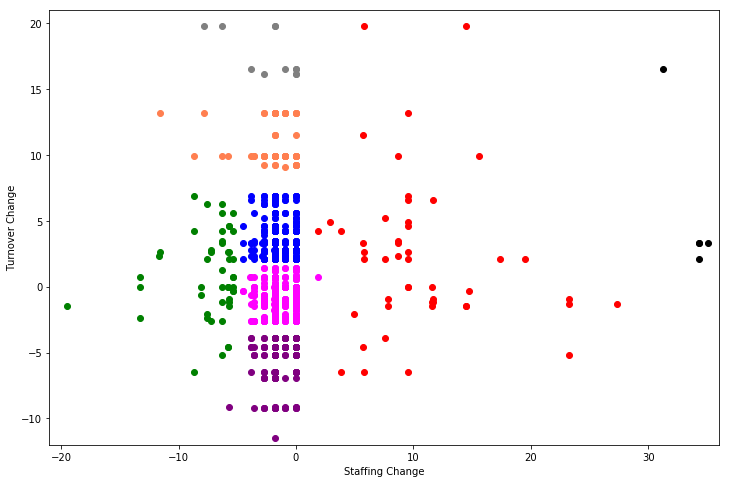

In [23]:
fig = plt.figure(figsize=(12,8))

ax = plt.subplot(111)
n_c = 1
n_list = [0,1,2,3,4,5,6,7]
c_list = ['red','blue','green','fuchsia','purple','black','grey','coral']

# n_list = [5,6]
# c_list = ['black', 'grey']

for n_n, n_c in zip(n_list, c_list):
    ax.scatter(df4[df4['prediction']==n_n]['CurrentStaffingScoreScale'],
               df4[df4['prediction']==n_n]['TurnoverScoreScale'], color=n_c)

ax.set_xlabel('Staffing Change')
ax.set_ylabel('Turnover Change')
ax.set_xlim((-21, 36))
ax.set_ylim((-12,21))
plt.savefig('Hierarchy_cluster_2D.png')

In [24]:
cluster_2d[cluster_2d['prediction'].isin([5,6])].to_csv('Hierarch_cluster_2D_RiskStores.csv')

In [25]:
# Print out stores.

t_l = df4[df4['CurrentStaffingScoreScale'] < -18]['Location'].tolist()
df4_saved[df4_saved['Location'].isin(t_l)][['Location', 'LocationName']]

,Location,LocationName
4052,711,South Burlington


In [26]:
for i in changecolumns:
    print("The %s values are:" % (i+'Scale')) 
    t = df4[i+'Scale'].unique().tolist()
    t = [int(i * 10) / 10 for i in t]
    print(sorted(t))

The CurrentStaffingScoreScale values are:
[-19.5, -13.3, -11.7, -11.6, -8.7, -8.1, -7.8, -7.6, -7.2, -6.2, -5.8, -5.6, -5.3, -4.5, -3.9, -3.8, -3.6, -2.9, -2.6, -1.9, -1.8, -0.9, 0.0, 1.9, 2.9, 3.8, 4.9, 5.6, 5.8, 7.6, 7.8, 8.7, 9.5, 11.6, 11.7, 14.5, 14.7, 15.6, 17.4, 19.5, 23.2, 27.3, 31.2, 34.3, 35.1]
The TurnoverScoreScale values are:
[-11.5, -9.2, -9.0, -6.9, -6.4, -5.1, -4.6, -3.8, -2.5, -2.3, -2.3, -2.0, -1.7, -1.4, -1.2, -1.1, -0.8, -0.5, -0.2, 0.0, 0.2, 0.5, 0.7, 0.8, 1.1, 1.2, 1.4, 2.1, 2.3, 2.5, 2.8, 3.3, 3.5, 3.8, 4.2, 4.6, 4.9, 5.1, 5.6, 6.3, 6.4, 6.6, 6.9, 9.0, 9.2, 9.8, 11.5, 13.2, 16.0, 16.5, 19.7, 23.0, 26.4]
The RecruitingScoreScale values are:
[-2.0, -0.9, -0.7, -0.6, -0.4, -0.3, -0.2, -0.1, 0.0, 0.1, 0.2, 0.2, 0.3, 0.4, 0.5, 0.5, 0.5, 0.6, 0.7, 0.8, 0.9, 0.9, 1.0, 1.1, 1.1, 1.2, 1.3, 1.4, 1.5, 1.5, 1.5, 1.7, 1.8, 1.9, 2.0, 2.1, 2.1, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0, 3.0, 3.3, 3.4, 3.5, 3.8, 3.9, 4.0, 4.2, 4.2, 4.4, 4.5, 4.5, 4.6, 4.9, 5.1, 5.2, 5.5, 

(array([  93.,  185.,  408.,  110.,   76.,   64.,   36.,   13.,   19.,   42.]),
 array([ -5.5 ,  -3.27,  -1.04,   1.19,   3.42,   5.65,   7.88,  10.11,
         12.34,  14.57,  16.8 ]),
 <a list of 10 Patch objects>)

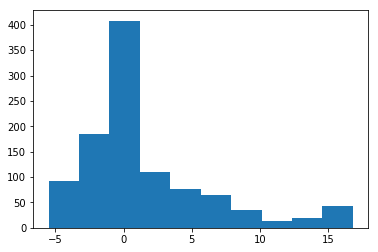

In [27]:
plt.hist(df4['ApplicantFlowScoreScale'], bins=10)

(array([   1.,    0.,    6.,   28.,   61.,   67.,    0.,  165.,   80.,
         205.,   96.,   46.,    0.,  139.,   45.,   46.,   19.,   13.,   29.]),
 array([-8.        , -7.15789474, -6.31578947, -5.47368421, -4.63157895,
        -3.78947368, -2.94736842, -2.10526316, -1.26315789, -0.42105263,
         0.42105263,  1.26315789,  2.10526316,  2.94736842,  3.78947368,
         4.63157895,  5.47368421,  6.31578947,  7.15789474,  8.        ]),
 <a list of 19 Patch objects>)

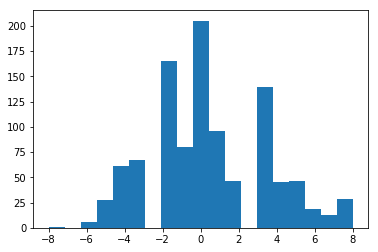

In [28]:
plt.hist(df4['ApplicantFlowScoreMeasure'], bins=19)

In [29]:
# Get the center peak range.

df_range = {}
for i in changecolumns:
    df_range[i+'Scale'] = []
    
df_range['CurrentStaffingScoreScale'].append(-3.12)
df_range['CurrentStaffingScoreScale'].append(2.34)

df_range['TurnoverScoreScale'].append(-3.92)
df_range['TurnoverScoreScale'].append(3.66)

df_range['RecruitingScoreScale'].append(-0.27)
df_range['RecruitingScoreScale'].append(3.19)

df_range['UnemploymentScoreScale'].append(-0.56)
df_range['UnemploymentScoreScale'].append(1.14)

df_range['KohlstoCountyCompScoreScale'].append(-1.02)
df_range['KohlstoCountyCompScoreScale'].append(0.24)

df_range['CountyScoreScale'].append(-1.76)
df_range['CountyScoreScale'].append(1.12)

df_range['AcceptanceRateScoreScale'].append(0.4)
df_range['AcceptanceRateScoreScale'].append(2.3)

df_range['ApplicantFlowScoreScale'].append(-1.04)
df_range['ApplicantFlowScoreScale'].append(1.19)

In [30]:
from sklearn.cluster import AgglomerativeClustering

X = df4[[i+'Scale' for i in changecolumns]]
x_p = []
y_p = []
for ncenter in [5]:
    ward = AgglomerativeClustering(n_clusters=ncenter).fit(X)
    predictions = ward.labels_
    print('The numbre of leaves for %d clusters is %8.2f.'%(ncenter, ward.n_leaves_))
    x_p.append(ncenter)
    y_p.append(ward.n_leaves_)
    df4 = df4.assign(prediction=list(predictions))
    result = df4.join(df4_saved.set_index('Location'), on='Location')
    # file = 'Hierarchy_' + str(ncenter) + '_clusters.csv'
    # result.to_csv(file)
    
# plt.plot(x_p, y_p)

The numbre of leaves for 5 clusters is  1046.00.


In [31]:
result = result.join(location[['Location','zip']].set_index('Location'), on='Location')
result.to_csv('Hierarchy_5_clusters_v2.11.csv')

In [32]:
t = result[result['prediction'] == 0][['Location','zip']]
t.to_csv('Hierarchy_5_clusters_v2.11_0_zip.csv')

In [33]:
result.columns

Index(['Location', 'CurrentStaffingScoreMeasure', 'TurnoverScoreMeasure',
       'RecruitingScoreMeasure', 'UnemploymentScoreMeasure',
       'KohlstoCountyCompScoreMeasure', 'CountyScoreMeasure',
       'AcceptanceRateScoreMeasure', 'ApplicantFlowScoreMeasure',
       'CurrentStaffingScoreScale', 'TurnoverScoreScale',
       'RecruitingScoreScale', 'UnemploymentScoreScale',
       'KohlstoCountyCompScoreScale', 'CountyScoreScale',
       'AcceptanceRateScoreScale', 'ApplicantFlowScoreScale', 'prediction',
       'LocationName', 'DistrictNumber', 'RegionNumber', 'TerrNum', 'EFFDT',
       'CurrentStartingRate', 'StaffingLevel', 'CurrentStaffingLevel',
       'YTDAverageStaffingLevel', 'CurrentStaffingScore', 'YTDStaffingScore',
       'TotalStaffingScore', 'LYTurn', 'YTDTurn', 'YOYTurnVariance',
       'TurnoverScore', 'UnemploymentScore', 'KohlstoCountyCompScore',
       'CountyScore', 'ApplicantFlow', 'AcceptanceRate', 'AcceptanceRateScore',
       'ApplicantFlowScore', 'RecruitingSc

In [34]:
if False:
    from sklearn.cluster import KMeans

    X = df4[[i+'Measure' for i in changecolumns]]
    x_p = []
    y_p = []
    for ncenter in [2,3,4,5]:
        kmeans = KMeans(n_clusters=ncenter, random_state=0).fit(X)
        predictions = kmeans.labels_
        print('The inertia for %d clusters is %8.2f.'%(ncenter, kmeans.inertia_))
        x_p.append(ncenter)
        y_p.append(kmeans.inertia_)
        df4 = df4.assign(prediction=list(predictions))
        result = df4.join(df4_saved.set_index('Location'), on='Location')
        # file = 'K_means_' + str(ncenter) + '_clusters.csv'
        # result.to_csv(file)
    
    plt.plot(x_p, y_p)

In [35]:
if False:
    from sklearn.cluster import DBSCAN

    X = df4[[i+'Measure' for i in changecolumns]]
    x_p = []
    y_p = []
    for x_eps in [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]:
        db = DBSCAN(eps=x_eps, min_samples=10).fit(X)
        predictions = db.labels_
        x_p.append(x_eps)
        y_p.append(len(set(predictions)))
        df4 = df4.assign(prediction=list(predictions))
        db_result = df4[['Location', 'prediction']].join(df4_saved.set_index('Location'), on='Location')
        # file = 'DBSCAN_' + str(x_eps) + '_clustering.csv'
        # db_result.to_csv(file)

    plt.plot(x_p, y_p)

### AgglomerativeClustering Analyze Results

In [36]:
ddff = pd.read_csv('./V2.11 5 Clusters/Hierarchy_5_clusters_v2.11.csv')

In [37]:
ddff = ddff[['Location', 'prediction',
       'CurrentStaffingScoreMeasure', 'TurnoverScoreMeasure',
       'RecruitingScoreMeasure', 'UnemploymentScoreMeasure',
       'KohlstoCountyCompScoreMeasure', 'CountyScoreMeasure',
       'AcceptanceRateScoreMeasure', 'ApplicantFlowScoreMeasure']]

In [38]:
names = ['CurrentStaffingScoreMeasure', 'TurnoverScoreMeasure',
       'RecruitingScoreMeasure', 'UnemploymentScoreMeasure',
       'KohlstoCountyCompScoreMeasure', 'CountyScoreMeasure',
       'AcceptanceRateScoreMeasure', 'ApplicantFlowScoreMeasure']
d = {}
for i_n in names:
    d[i_n] = []
    for i_v in [0,1,2,3,4]:
        d[i_n].append(len(ddff[(ddff['prediction'] == i_v) & (ddff[i_n] > 1)]) / len(ddff[ddff['prediction'] == i_v]))

In [39]:
cluster_feature = pd.DataFrame(d)

In [40]:
cluster_feature.to_csv('Hierarchy_clustering_v2.11_feature.csv')

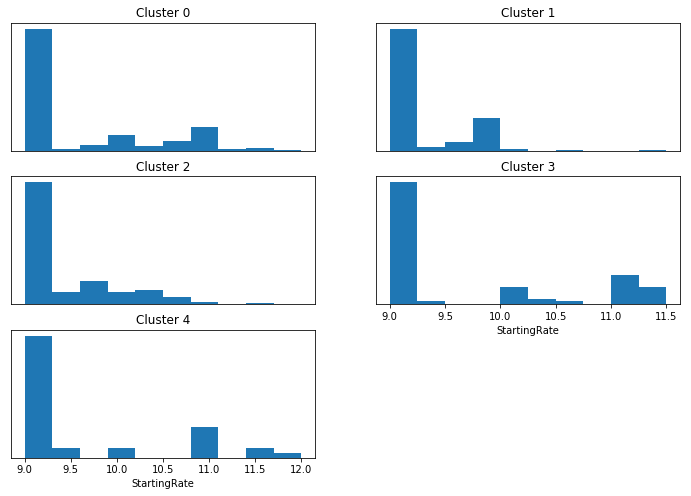

In [41]:
fig = plt.figure(figsize=(12,8))

ax = fig.add_subplot(321)
ax.hist(result[result['prediction'] == 0]['CurrentStartingRate'], bins=10)
ax.set_title('Cluster 0')
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)

ax = fig.add_subplot(322)
ax.hist(result[result['prediction'] == 1]['CurrentStartingRate'], bins=10)
ax.set_title('Cluster 1')
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)

ax = fig.add_subplot(323)
ax.hist(result[result['prediction'] == 2]['CurrentStartingRate'], bins=10)
ax.set_title('Cluster 2')
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)

ax = fig.add_subplot(324)
ax.hist(result[result['prediction'] == 3]['CurrentStartingRate'], bins=10)
ax.set_title('Cluster 3')
ax.set_xlabel('StartingRate')
ax.yaxis.set_visible(False)

ax = fig.add_subplot(325)
ax.hist(result[result['prediction'] == 4]['CurrentStartingRate'], bins=10)
ax.set_title('Cluster 4')
ax.set_xlabel('StartingRate')
ax.yaxis.set_visible(False)

plt.savefig('Hieararchy_5_StartingRate.png')

In [42]:
result.columns

Index(['Location', 'CurrentStaffingScoreMeasure', 'TurnoverScoreMeasure',
       'RecruitingScoreMeasure', 'UnemploymentScoreMeasure',
       'KohlstoCountyCompScoreMeasure', 'CountyScoreMeasure',
       'AcceptanceRateScoreMeasure', 'ApplicantFlowScoreMeasure',
       'CurrentStaffingScoreScale', 'TurnoverScoreScale',
       'RecruitingScoreScale', 'UnemploymentScoreScale',
       'KohlstoCountyCompScoreScale', 'CountyScoreScale',
       'AcceptanceRateScoreScale', 'ApplicantFlowScoreScale', 'prediction',
       'LocationName', 'DistrictNumber', 'RegionNumber', 'TerrNum', 'EFFDT',
       'CurrentStartingRate', 'StaffingLevel', 'CurrentStaffingLevel',
       'YTDAverageStaffingLevel', 'CurrentStaffingScore', 'YTDStaffingScore',
       'TotalStaffingScore', 'LYTurn', 'YTDTurn', 'YOYTurnVariance',
       'TurnoverScore', 'UnemploymentScore', 'KohlstoCountyCompScore',
       'CountyScore', 'ApplicantFlow', 'AcceptanceRate', 'AcceptanceRateScore',
       'ApplicantFlowScore', 'RecruitingSc

In [43]:
feature = 'CurrentStaffingScoreScale'
sorted(result[feature].unique().tolist())

[-19.5,
 -13.299999999999999,
 -11.7,
 -11.6,
 -8.7,
 -8.1,
 -7.8,
 -7.6,
 -7.199999999999999,
 -6.299999999999999,
 -5.8,
 -5.699999999999999,
 -5.3999999999999995,
 -4.5,
 -3.9,
 -3.8,
 -3.5999999999999996,
 -2.9,
 -2.6999999999999997,
 -1.9,
 -1.7999999999999998,
 -0.8999999999999999,
 0.0,
 1.9,
 2.9,
 3.8,
 4.9,
 5.699999999999999,
 5.8,
 7.6,
 7.8,
 8.7,
 9.5,
 11.6,
 11.7,
 14.5,
 14.700000000000001,
 15.6,
 17.4,
 19.5,
 23.2,
 27.3,
 31.2,
 34.300000000000004,
 35.1]

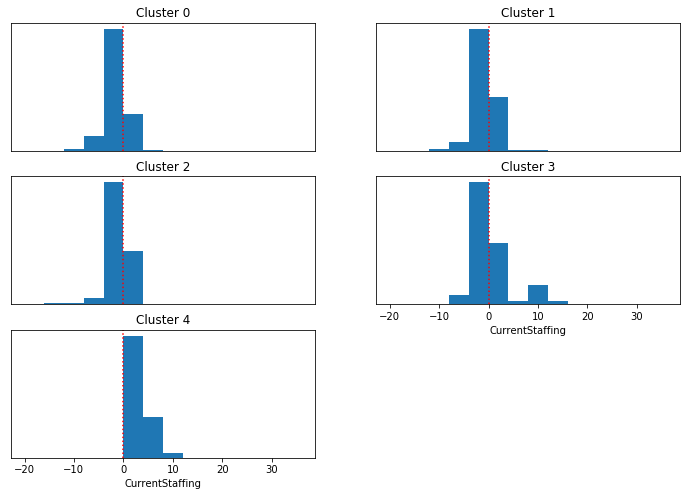

In [44]:
fig = plt.figure(figsize=(12,8))

label = 'CurrentStaffing'
# ApplicantFlow
# a_bins = [-6,-4,-2,0,2,4,6,8,10,12,14,16]

# Recruiting
# a_bins= [-3,-1,1,3,5,7,9,11,13,15]

# AcceptanceRate
# a_bins = [-2,0,2,4,6,8,10,12,14,16,18]

# CurrentStaffing
a_bins = [-20,-16,-12,-8,-4,0,4,8,12,16,20,24,28,32,36]

ax = fig.add_subplot(321)
ax.hist(result[result['prediction'] == 0][feature], bins=a_bins)
ax.set_title('Cluster 0')
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.axvline(x=0, color='red', linestyle=':')

ax = fig.add_subplot(322)
ax.hist(result[result['prediction'] == 1][feature], bins=a_bins)
ax.set_title('Cluster 1')
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.axvline(x=0, color='red', linestyle=':')

ax = fig.add_subplot(323)
ax.hist(result[result['prediction'] == 2][feature], bins=a_bins)
ax.set_title('Cluster 2')
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.axvline(x=0, color='red', linestyle=':')

ax = fig.add_subplot(324)
ax.hist(result[result['prediction'] == 3][feature], bins=a_bins)
ax.set_title('Cluster 3')
ax.set_xlabel(label)
ax.yaxis.set_visible(False)
ax.axvline(x=0, color='red', linestyle=':')

ax = fig.add_subplot(325)
ax.hist(result[result['prediction'] == 4]['AcceptanceRateScoreScale'], bins=a_bins)
ax.set_title('Cluster 4')
ax.set_xlabel(label)
ax.yaxis.set_visible(False)
ax.axvline(x=0, color='red', linestyle=':')

file = 'Hierarchy_5_' + label + '.png'
plt.savefig(file)

In [45]:
result[result['prediction'] ==4].to_csv('Hierarch_cluster_4.csv')